# Ridge & Lasso

### Generate ground-truth data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

np.random.seed(42)

n_samples, n_features = 100, 30

#create features
X = np.random.randn(n_samples, n_features)

#create ground-truth coefficients
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
#create linear data y = X'*coef
y = np.dot(X, coef)

# Add noise
y += 0.05 * np.random.normal(size=n_samples)

# Split data in train set and test set
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

### Apply ridge and visualize the obtained coefficients

rss on test data : 0.322166


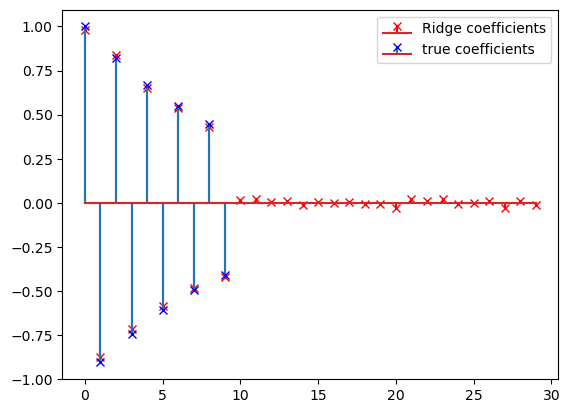

In [134]:
from sklearn.linear_model import Ridge

alpha = 1e-2
model = Ridge(alpha=alpha,normalize=True)

y_pred = model.fit(X_train, y_train).predict(X_test)
rss = sum((y_test-y_pred)**2)
print("rss on test data : %f" % rss)

m, s, _ = plt.stem(
    np.where(model.coef_)[0],
    model.coef_[model.coef_ != 0],
    markerfmt="x",
    label="Ridge coefficients",
)
plt.setp([m, s], color="red")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
)

plt.legend(loc="best")
plt.show()

### Apply lasso and visualize the obtained coefficients

rss on test data : 6.405983


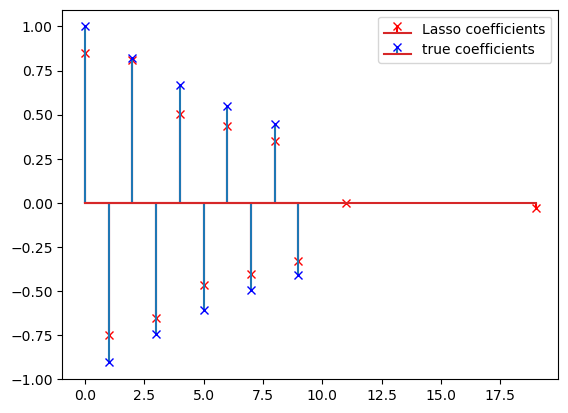

In [135]:
from sklearn.linear_model import Lasso

alpha = 1e-2
model = Lasso(alpha=alpha,normalize=True)

y_pred = model.fit(X_train, y_train).predict(X_test)
rss = sum((y_test-y_pred)**2)
print("rss on test data : %f" % rss)

m, s, _ = plt.stem(
    np.where(model.coef_)[0],
    model.coef_[model.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
)
plt.setp([m, s], color="red")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
)

plt.legend(loc="best")
plt.show()

rss on test data : 15.552859


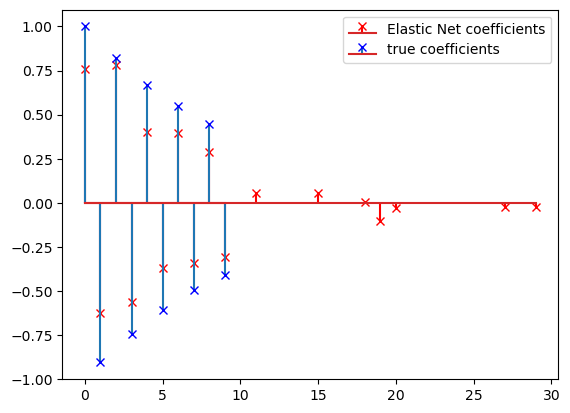

In [6]:
from sklearn.linear_model import ElasticNet

alpha = 1e-2
model = ElasticNet(alpha=alpha,l1_ratio=0.8,normalize=True)

y_pred = model.fit(X_train, y_train).predict(X_test)
rss = sum((y_test-y_pred)**2)
print("rss on test data : %f" % rss)

m, s, _ = plt.stem(
    np.where(model.coef_)[0],
    model.coef_[model.coef_ != 0],
    markerfmt="x",
    label="Elastic Net coefficients",
)
plt.setp([m, s], color="red")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
)

plt.legend(loc="best")
plt.show()

In [7]:
model.coef_

array([ 0.76010083, -0.62477054,  0.78360027, -0.5634078 ,  0.40413258,
       -0.36914767,  0.39453029, -0.33814736,  0.28932485, -0.30912767,
        0.        ,  0.05841019,  0.        , -0.        ,  0.        ,
        0.05814618,  0.        , -0.        ,  0.00334122, -0.10104079,
       -0.0315576 ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.02177218, -0.        , -0.02450643])